# IMPORT

### Import Library untuk Data Manipulasi dan Visualisasi
mengimpor library yang digunakan

- **pandas (pd)** → baca dan atur data tabel  
- **numpy (np)** → operasi angka/array  
- **matplotlib.pyplot (plt)** → bikin grafik sederhana  
- **seaborn (sns)** → grafik lebih rapi dan enak dilihat  
- **sklearn.metrics** → cek performa model (`MAE`, `MSE`, `R2`)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

### Import Library untuk Pemodelan Machine Learning
menyiapkan library dari scikit-learn yang akan digunakan

- **train_test_split** → buat membagi data jadi data latihan (train) dan data uji (test)  
- **LinearRegression** → model regresi sederhana, mencoba memodelkan hubungan linier antara fitur dan target.
- **RandomForestRegressor** adalah algoritma berbasis *ensemble learning* dengan banyak decision tree untuk memprediksi nilai target secara lebih kompleks.


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

### Import Library untuk Evaluasi Model
mengimpor metrik evaluasi

- **mean_absolute_error (MAE)** → rata-rata selisih absolut antara prediksi dan nilai asli  
- **mean_squared_error (MSE)** → rata-rata kuadrat selisih antara prediksi dan nilai asli, lebih sensitif ke outlier  
- **r2_score (R²)** → seberapa baik model menjelaskan variasi data (semakin mendekati 1, semakin bagus)


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# DATA UNDERSTANDING


Data yang Anda gunakan pada proyek kali ini adalah Household Monthly Electricity Bill dataset yang diunduh dari Kaggle (https://www.kaggle.com/datasets/gireeshs/household-monthly-electricity-bill?resource=download [link text](https://)).  Dataset ini terdiri dari 1000 data yang berisi informasi mengenai jumlah ruangan (num_rooms), jumlah penghuni rumah (num_people), luas rumah (house area), kepemilikan AC (is_ac), kepemilikan TV (is_tv), tipe rumah (is_flat), rata-rata pemasukan (ave_monthly_income), jumlah anak(num_children), lokasi rumah (is_urban), jumlah tagihan listrik bulanan (amount_paid). Fitur numerik yang digunakan dalam analisis ini adalah jumlah orang dalam rumah (num_people) dan luas rumah (house area), sedangkan fitur target adalah jumlah tagihan listrik yang dibayarkan (amount_paid). Kesempuluh fitur ini yang akan digunakan untuk menemukan pola pada data, sedangkan tagihan merupakan fitur target.

# DATA LOADING

### Load Dataset dari Google Drive
Dataset disimpan di Google Drive kemudian diakses dan dimuat ke dalam program menggunakan **pandas**.  
Langkah-langkah:
- Siapkan File CSV di Google Drive  
- Ambil **file ID** dari link Google Drive  
- Buat **direct download link** supaya bisa dibaca pakai pandas  
- Load data pakai `pd.read_csv` dan simpan di variabel `consumption`



In [ ]:
# link file di Google Drive
url = 'https://drive.google.com/file/d/1COGBPHhANXxutOp7c4lzS6VsovBL0HeF/view?usp=sharing'

# ambil file ID dari link
file_id = url.split('/d/')[1].split('/')[0]

# buat direct download link
dwn_url = f'https://drive.google.com/uc?id={file_id}'

# load dataset
consumption = pd.read_csv(dwn_url)

consumption

,num_rooms,num_people,housearea,is_ac,is_tv,is_flat,ave_monthly_income,num_children,is_urban,amount_paid
0,3,3,742.57,1,1,1,9675.93,2,0,560.481447
1,1,5,952.99,0,1,0,35064.79,1,1,633.283679
2,3,1,761.44,1,1,1,22292.44,0,0,511.879157
3,0,5,861.32,1,1,0,12139.08,0,0,332.992035
4,1,8,731.61,0,1,0,17230.10,2,1,658.285625
...,...,...,...,...,...,...,...,...,...,...
995,3,0,991.31,0,1,0,12687.26,1,1,655.870111
996,2,5,847.97,0,1,0,39502.92,0,0,354.472693
997,2,4,660.94,1,0,0,10145.17,0,1,568.660550
998,1,1,814.75,0,1,1,15535.05,0,1,653.423314


# EXPLORATORY DATA ANALYSIS

### Exploratory Data Analysis - Deskripsi Variabel
Melihat Struktur Dataset
- `consumption.info()` → untuk ringkasan dataset:  
  - Jumlah baris dan kolom  
  - Nama kolom  
  - Tipe data setiap kolom  
  - Ada nilai yang kosong (missing values) atau nggak  

Biar tau struktur data sebelum mulai analisis.


In [ ]:
consumption.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   num_rooms           1000 non-null   int64  
 1   num_people          1000 non-null   int64  
 2   housearea           1000 non-null   float64
 3   is_ac               1000 non-null   int64  
 4   is_tv               1000 non-null   int64  
 5   is_flat             1000 non-null   int64  
 6   ave_monthly_income  1000 non-null   float64
 7   num_children        1000 non-null   int64  
 8   is_urban            1000 non-null   int64  
 9   amount_paid         1000 non-null   float64
dtypes: float64(3), int64(7)
memory usage: 78.3 KB


### Exploratory Data Analysis - Deskripsi Variabel
Statistik Deskriptif Dataset
Lihat ringkasan statistik dataset

- `consumption.describe()` → kasih gambaran cepat tentang data numerik:  
  - Mean (rata-rata)  
  - Standard deviation (simpangan baku)  
  - Min & max  
  - Quartiles (25%, 50%, 75%)  

Biar paham distribusi awal data, mendeteksi outlier, dan mengetahui rentang nilai dari setiap variabel numerik.


In [ ]:
consumption.describe()

,num_rooms,num_people,housearea,is_ac,is_tv,is_flat,ave_monthly_income,num_children,is_urban,amount_paid
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,1.962000,4.897000,794.703420,0.376000,0.798000,0.477000,24684.986550,1.078000,0.608000,600.396359
std,1.030348,2.007591,147.771736,0.484622,0.401693,0.499721,9678.228224,0.934232,0.488441,181.406210
min,-1.000000,-1.000000,244.400000,0.000000,0.000000,0.000000,-1576.440000,0.000000,0.000000,87.851850
25%,1.000000,4.000000,691.037500,0.000000,1.000000,0.000000,18036.762500,0.000000,0.000000,475.065141
50%,2.000000,5.000000,789.970000,0.000000,1.000000,0.000000,24742.575000,1.000000,1.000000,598.331726
75%,3.000000,6.000000,892.955000,1.000000,1.000000,1.000000,31402.357500,2.000000,1.000000,729.930489
max,5.000000,11.000000,1189.120000,1.000000,1.000000,1.000000,56531.080000,4.000000,1.000000,1102.994109


### Exploratory Data Analysis - Missing Value
Mengecek Missing Values
Pada tahap ini digunakan fungsi `isnull().sum()` untuk menghitung jumlah nilai kosong (missing values) pada setiap kolom dataset.  

- `consumption.isnull().sum()` → ngecek ada kolom yang punya nilai kosong (missing values) atau nggak  
- Penting supaya kita tahu kalau ada data yang perlu diisi atau dibersihkan sebelum analisis. berhubung missing valuenya 0 jadi kita tidak perlu melakukan pembersihan data.



In [ ]:
print("Missing values:\n", consumption.isnull().sum())

Missing values:
 num_rooms             0
num_people            0
housearea             0
is_ac                 0
is_tv                 0
is_flat               0
ave_monthly_income    0
num_children          0
is_urban              0
amount_paid           0
dtype: int64


### Exploratory Data Analysis - Univariate Analysis
untuk fitur numerik, kita akan melihat histogram masing-masing fiturnya menggunakan code dibawah ini dan dari grafik-grafik distribusi variabel dibawah, ada beberapa insight penting :

- **num_rooms**: Sebagian besar rumah memiliki 2–3 kamar, menunjukkan tipe rumah standar.
- **num_people**: Mayoritas rumah dihuni oleh 4–6 orang, dengan distribusi mendekati normal.
- **housearea**: Luas rumah berkisar antara 600–900, dengan sedikit rumah yang sangat luas.
- **is_ac**: Lebih banyak rumah yang tidak memiliki AC.
- **is_tv**: Hampir semua rumah memiliki TV.
- **is_flat**: Sebagian besar tempat tinggal berupa flat/apartemen.
- **ave_monthly_income**: Pendapatan bulanan cukup tersebar, tapi banyak yang berada di kisaran 20.000–30.000.
- **num_children**: Kebanyakan rumah memiliki 0–2 anak.
- **is_urban**: Mayoritas rumah berada di wilayah perkotaan.
- **amount_paid**: Pembayaran energi cenderung normal dengan puncak sekitar 600


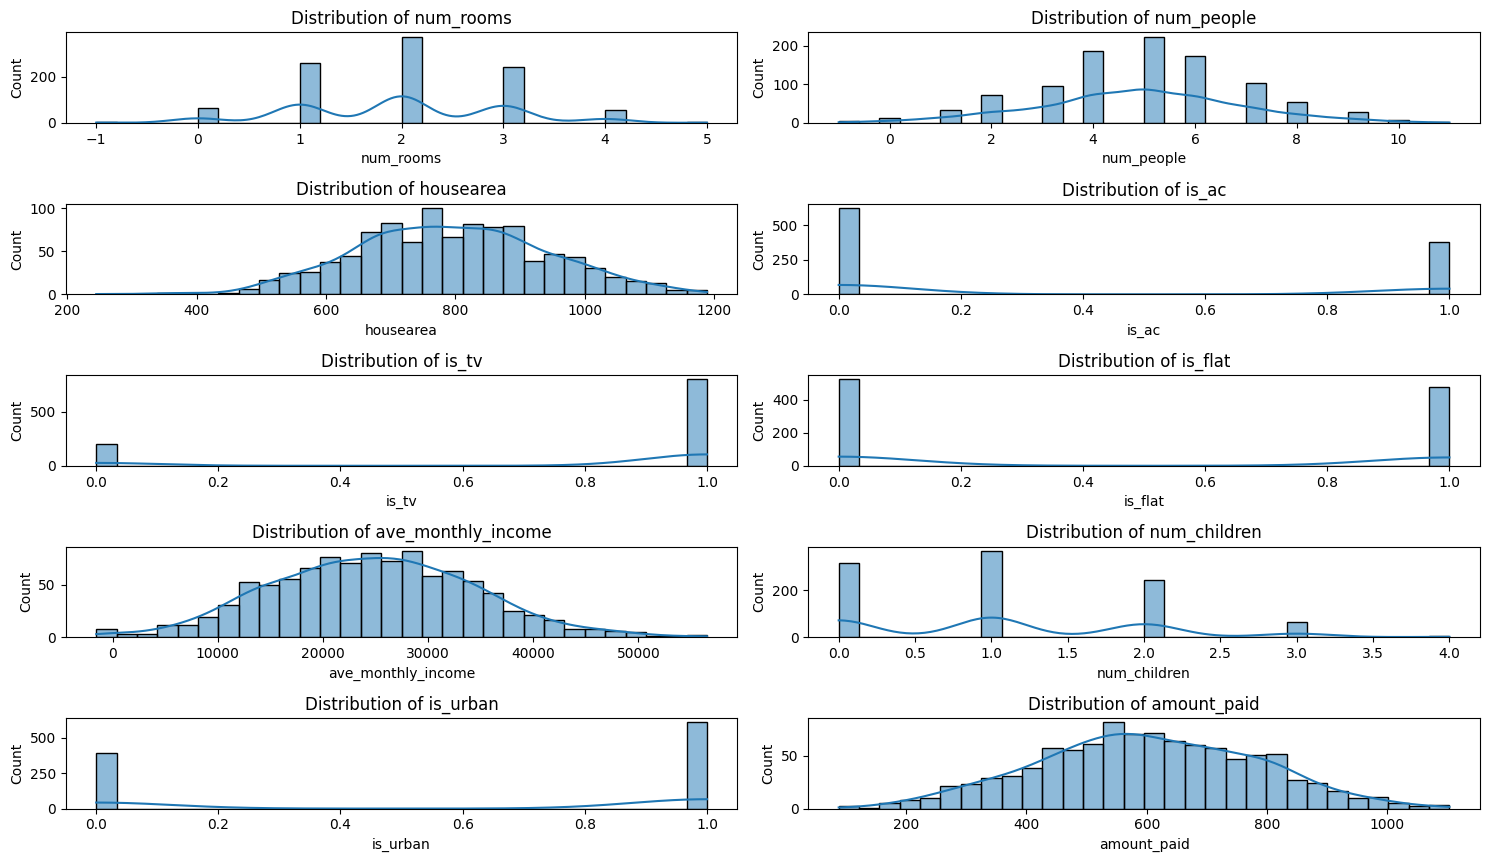

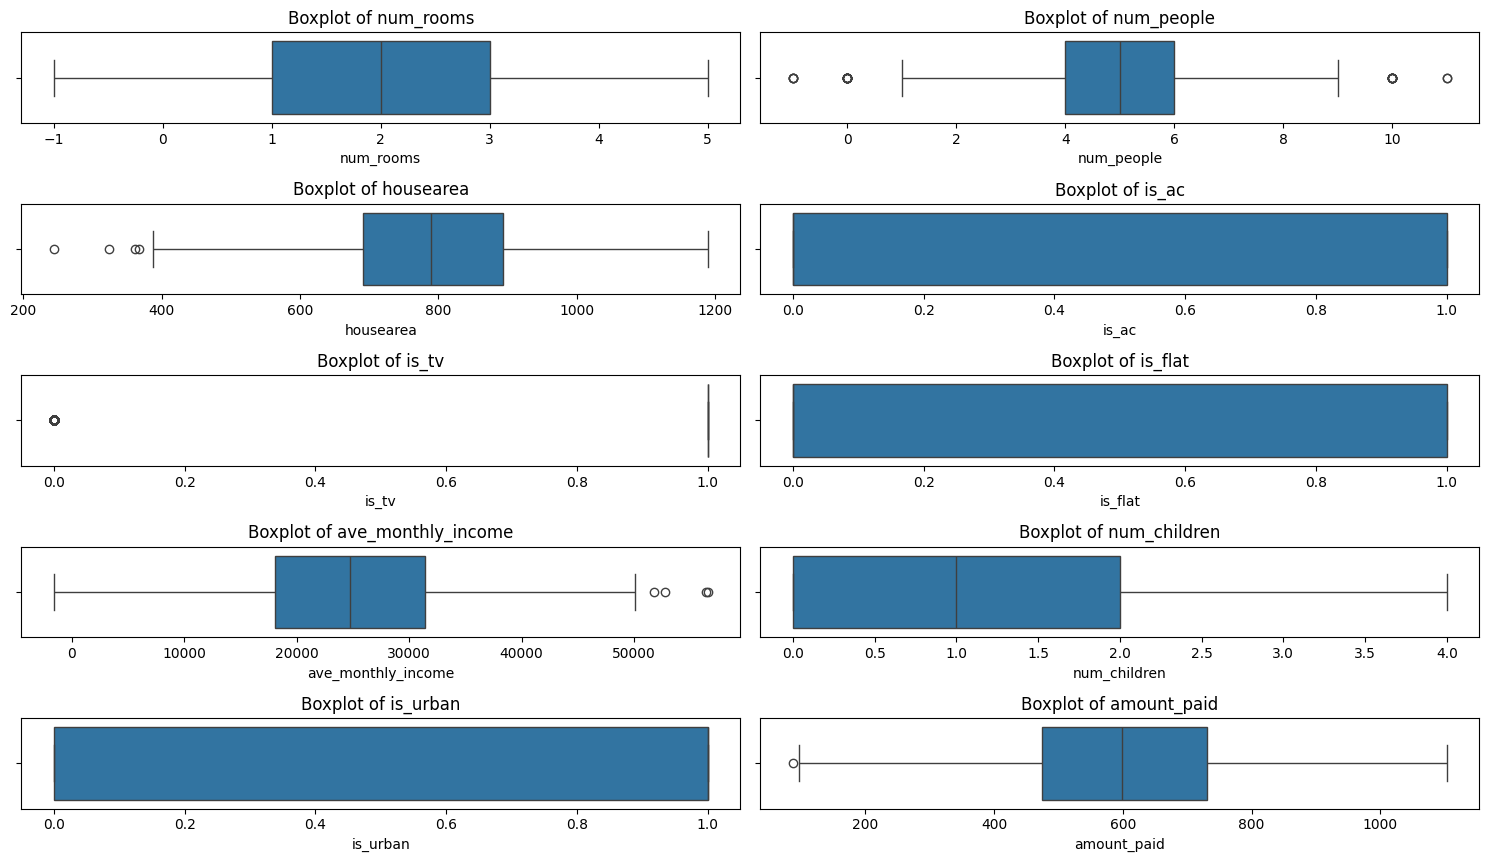

In [ ]:
# Visualisasi distribusi untuk setiap kolom numerik
num_cols = consumption.select_dtypes(include=[np.number]).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(len(num_cols)//2 + 1, 2, i)
    sns.histplot(consumption[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

# Boxplot untuk mendeteksi outlier
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(len(num_cols)//2 + 1, 2, i)
    sns.boxplot(x=consumption[col])
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()

### Exploratory Data Analysis - Multivariate Analysis
Untuk mengamati hubungan antara fitur numerik, kita akan menggunakan fungsi pairplot().


Insight Grafik Dibawah
Dari grafik terlihat bahwa variabel diskrit seperti `num_rooms`, `num_people`, `num_children`, dan `num_adults` tersebar dengan baik, sementara `energy_consumption` cenderung mengikuti distribusi normal. Jumlah orang di rumah (`num_people`) berkorelasi positif dengan jumlah kamar (`num_rooms`) dan konsumsi energi. Selain itu, kelompok dengan pendapatan lebih tinggi (`income_group`) juga cenderung mengonsumsi energi lebih banyak. Faktor utama konsumsi energi adalah jumlah orang, jumlah kamar, dan pendapatan, dengan `num_people` sebagai prediktor paling penting.


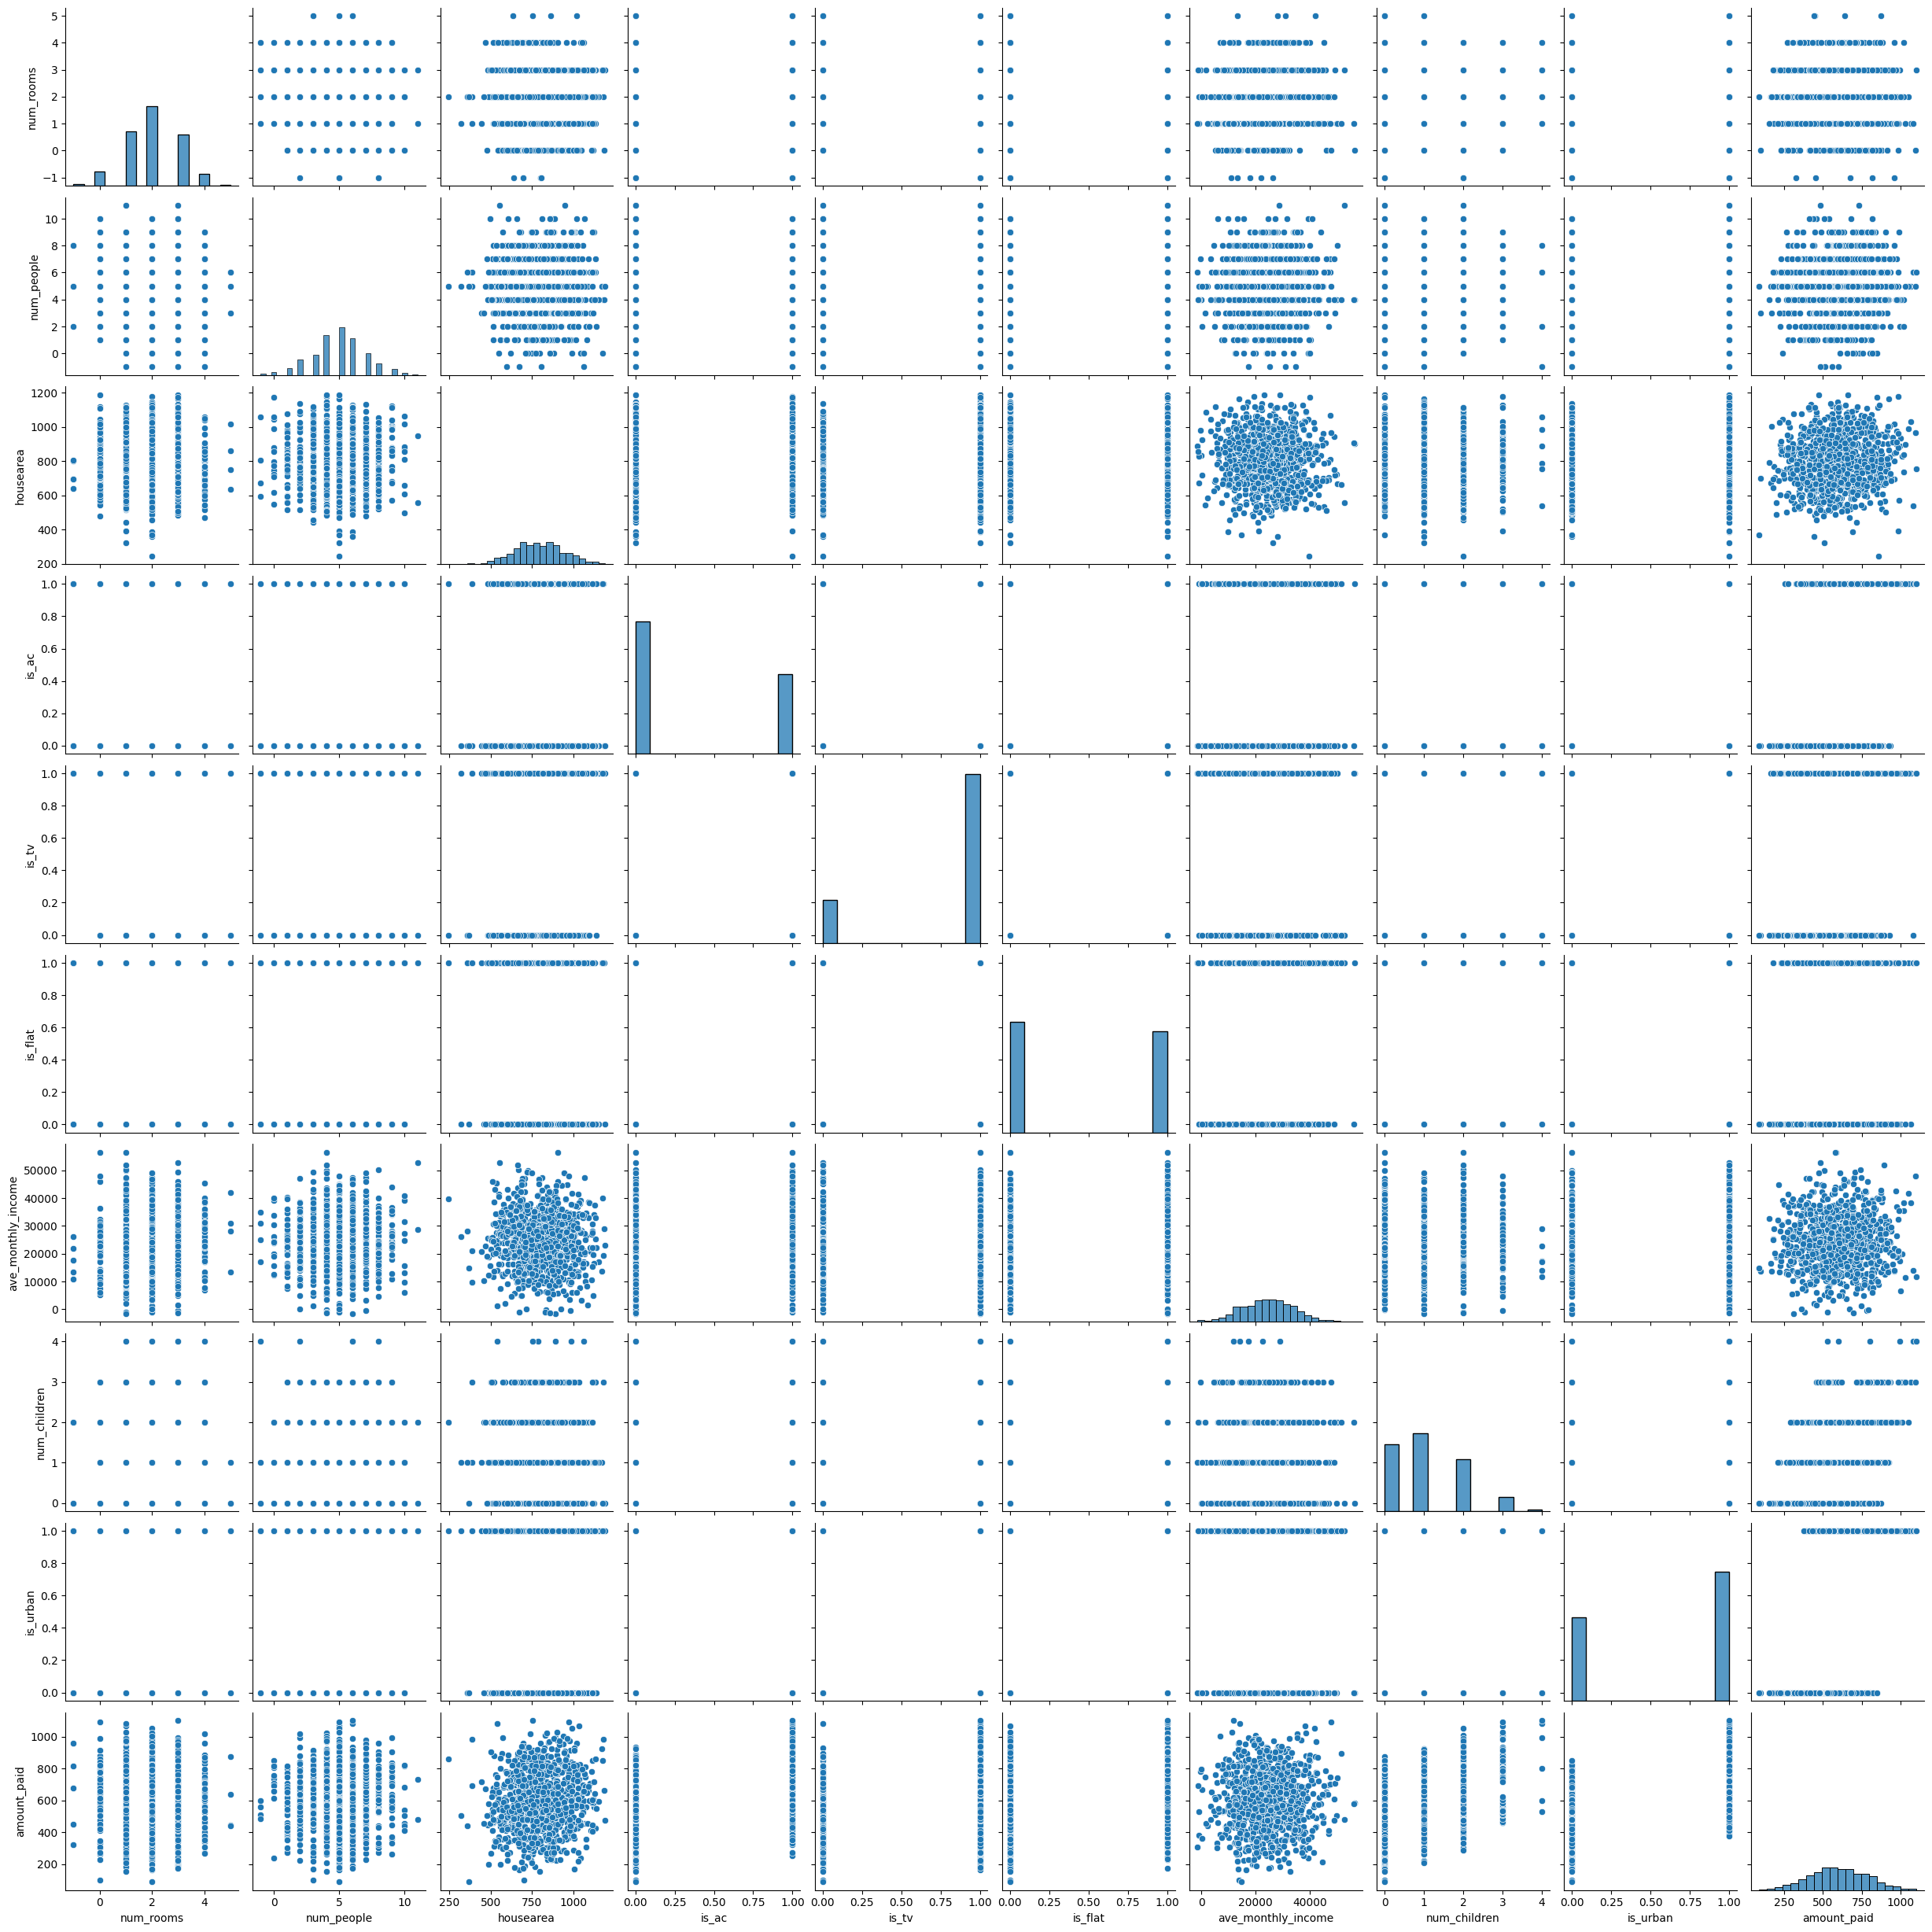

In [ ]:
sns.pairplot(consumption)
plt.show()

# DATA PREPARATION

### Menentukan Fitur (X) dan Target (y)
Pada tahap ini, dataset dipisahkan menjadi:
- **Target (y):** `amount_paid` → nilai yang ingin diprediksi.
- **Features (X):** semua kolom kecuali `amount_paid` → variabel input untuk model.
- **Tujuan:** Memisahkan data menjadi fitur dan target agar siap untuk pemodelan.


In [ ]:
# Target: amount_paid
# Features: semua kolom kecuali amount_paid

X = consumption.drop("amount_paid", axis=1)
y = consumption["amount_paid"]

### Membagi Dataset menjadi Data Latih dan Data Uji
Pada tahap ini, dataset dibagi menjadi dua bagian:
- **Train set (80%)** → digunakan untuk melatih model.  
- **Test set (20%)** → digunakan untuk evaluasi model.  

Parameter yang digunakan:
- `test_size=0.2` → artinya 20% data akan digunakan untuk uji, 80% untuk latih.
- `random_state=42` → digunakan untuk memastikan hasil pembagian selalu konsisten (reproducible).

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# MODEL DEVELOPMENT

### Model Development dengan Linear Regression
- **Model:** Linear Regression  
- **Langkah:** Model dilatih dengan data training (`X_train`, `y_train`).
- **Output:** `y_pred_lin` → hasil prediksi yang akan dibandingkan dengan `y_test`.

Parameter Linear Regression
Saya menggunakan default

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_pred_lin = lin_reg.predict(X_test)

### Model Development dengan Random Forest Regressor

- **Model:** RandomForest Regressor.
- **Proses:** Model dilatih dengan data training (`X_train`, `y_train`).  
- **Output:** `y_pred_rf` → hasil prediksi pada data `X_test` untuk dibandingkan dengan `y_test`.

Parameter RandomForestRegressor

- **n_estimators=100** → jumlah pohon (trees) dalam forest. Semakin banyak, semakin stabil prediksi, namun lama aja prosesnya.  
- **random_state=42** → memastikan hasil training konsisten.  



In [ ]:
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)


y_pred_rf = rf_reg.predict(X_test)

# EVALUASI MODEL

### Evaluasi Model Linear Regression

- **MAE (Mean Absolute Error):** Rata-rata selisih absolut antara nilai aktual dan prediksi.  
- **RMSE (Root Mean Squared Error):** Akar dari rata-rata kuadrat error, memberi penalti lebih besar pada error yang besar.  
- **R² Score:** Mengukur seberapa baik model menjelaskan variasi data (0–1, semakin tinggi semakin baik).  


In [ ]:
print("\n=== Linear Regression Evaluation ===")
print("MAE:", mean_absolute_error(y_test, y_pred_lin))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lin)))
print("R2 Score:", r2_score(y_test, y_pred_lin))


=== Linear Regression Evaluation ===
MAE: 54.04134389596424
RMSE: 62.917644754538834
R2 Score: 0.8848367976690299


### Evaluasi Model Random Forest Regressor

- **MAE (Mean Absolute Error):** Rata-rata selisih absolut antara nilai aktual dan prediksi.  
- **RMSE (Root Mean Squared Error):** Akar dari rata-rata kuadrat error, memberi penalti lebih besar pada error yang besar.  
- **R² Score:** Mengukur seberapa baik model menjelaskan variasi data (0–1, semakin tinggi semakin baik).  

In [ ]:
print("\n=== Random Forest Evaluation ===")
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print("R2 Score:", r2_score(y_test, y_pred_rf))


=== Random Forest Evaluation ===
MAE: 60.05821294586198
RMSE: 72.12878209543497
R2 Score: 0.8486487482730606


# VISUALISASI HASIL PREDIKSI VS NILAI AKTUAL

- **Plot:** Membandingkan nilai aktual (`y_test`) dengan hasil prediksi dari:  
  - Random Forest (biru)
  - Linear Regression (orange)
- **Garis putus-putus (diagonal):** Referensi jika prediksi = aktual (model sempurna).  
- **Interpretasi:**  
  - Titik yang dekat dengan garis diagonal → prediksi akurat.  
  - Titik yang jauh dari garis diagonal → error lebih besar.  

Insight :
  Grafik dibawah ini membandingkan nilai tagihan listrik sebenarnya dengan prediksi dari dua model, Random Forest dan Linear Regression. Kedua model berhasil memprediksi dengan cukup baik karena titik-titiknya dekat dengan garis diagonal yang menunjukkan prediksi sama dengan nilai asli. Linear Regression terlihat sedikit lebih rapat di sekitar garis tersebut, tapi kedua model punya performa yang cukup mirip.

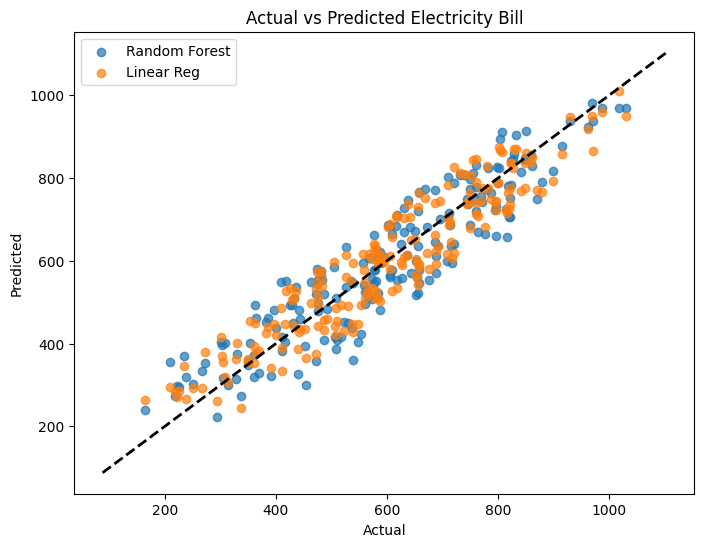

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_rf, alpha=0.7, label="Random Forest")
plt.scatter(y_test, y_pred_lin, alpha=0.7, label="Linear Reg")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted Electricity Bill")
plt.legend()
plt.show()

# FEATURE IMPORTANCE DARI RANDOM FOREST

### Analisis Feature Importance (Random Forest)
- **Tujuan:** Mengetahui kontribusi setiap fitur terhadap prediksi model Random Forest.  
- **Proses:**  
  - Menghitung nilai importance tiap fitur.  
  - Menyusun fitur berdasarkan tingkat kepentingannya.  
- **Visualisasi:** Barplot menunjukkan fitur dengan pengaruh terbesar hingga terkecil.  
- **Interpretasi:**  
  - Fitur dengan nilai importance tinggi → sangat berpengaruh pada prediksi.  
  - Fitur dengan nilai rendah → pengaruhnya kecil terhadap model.  

Insight :
Fitur `is_urban` paling berpengaruh dalam prediksi konsumsi energi,  
diikuti oleh `num_children` dan `is_ac`.  Fitur lain seperti `housearea`, `ave_monthly_income`, dan `is_tv` memiliki pengaruh kecil,  sedangkan `num_people` dan `num_rooms` memberikan kontribusi paling sedikit.

/tmp/ipython-input-1264717793.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=feat_imp, palette="viridis")


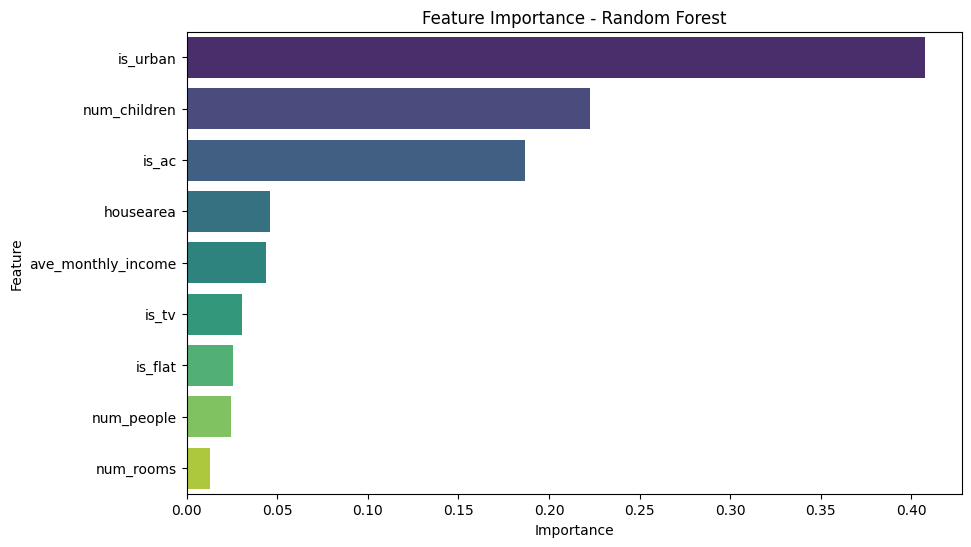

In [ ]:
importances = rf_reg.feature_importances_
feature_names = X.columns


feat_imp = pd.DataFrame({"Feature": feature_names, "Importance": importances})
feat_imp = feat_imp.sort_values(by="Importance", ascending=False)


plt.figure(figsize=(10,6))
sns.barplot(x="Importance", y="Feature", data=feat_imp, palette="viridis")
plt.title("Feature Importance - Random Forest")
plt.show()